In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/heart_disease_raw.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.replace("?", np.nan, inplace=True)
df = df.astype(float)
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.fillna(df.median(), inplace=True)


In [8]:
categorical_cols = ["sex","cp","fbs","restecg","exang","slope","thal"]
df[categorical_cols] = df[categorical_cols].astype(int)
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6,0.0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,1.0
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,1.0
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,0.0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0.0,7,1.0
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2.0,7,1.0
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1.0,7,1.0
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1.0,3,1.0


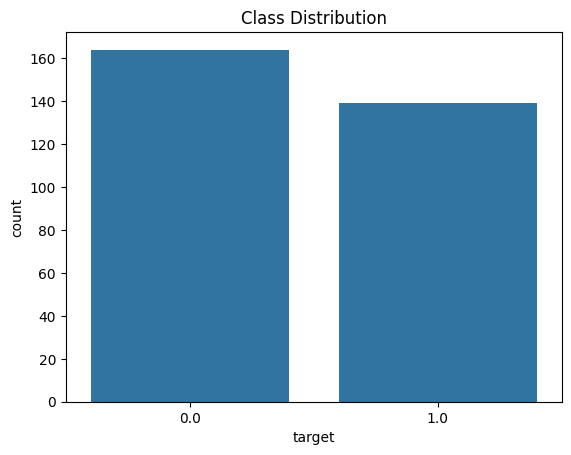

In [9]:
sns.countplot(x="target", data=df)
plt.title("Class Distribution")
plt.show()


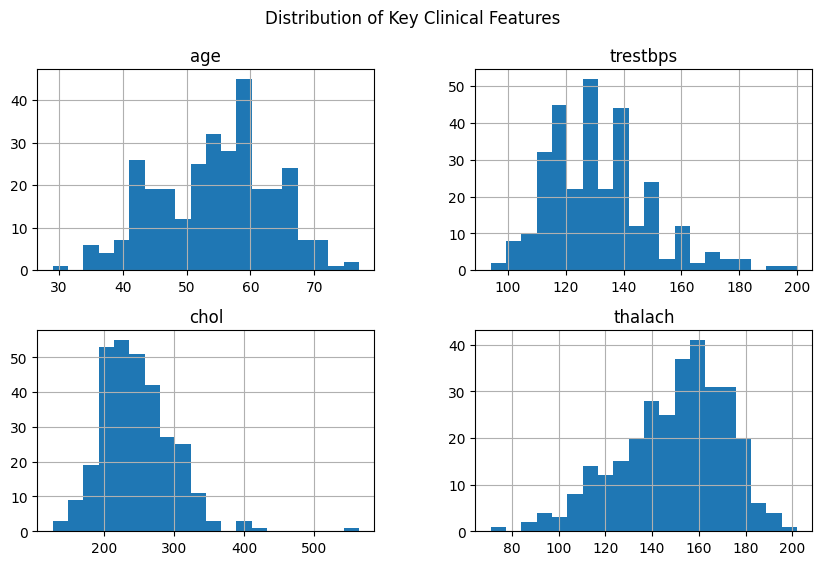

In [11]:
df[['age', 'trestbps', 'chol', 'thalach']].hist(
    bins=20, figsize=(10,6)
)
plt.suptitle("Distribution of Key Clinical Features")
plt.show()

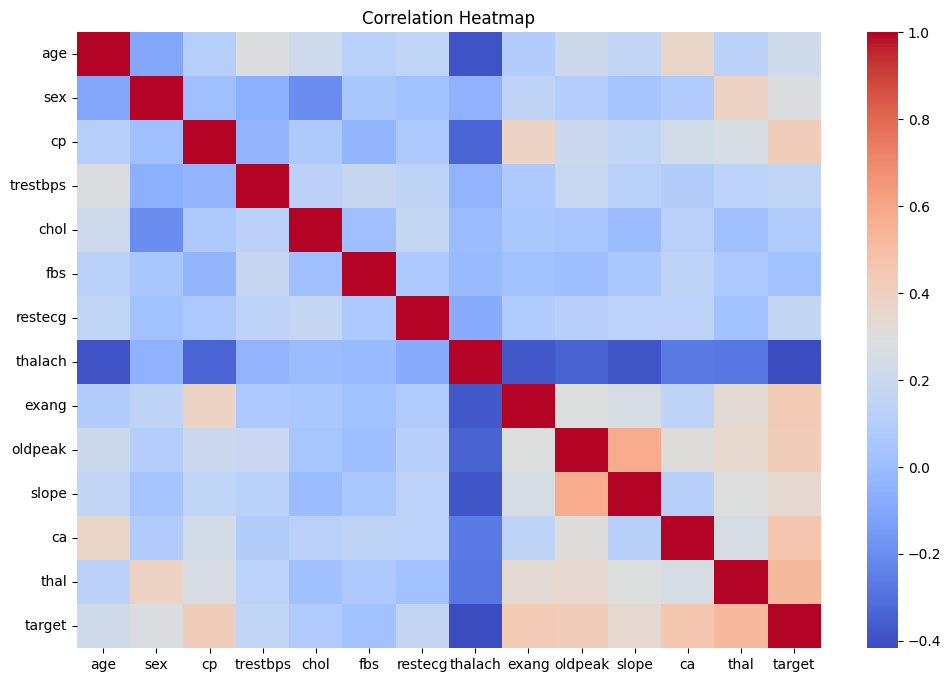

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [13]:
df.to_csv("../data/processed/heart_disease_clean.csv", index=False)